In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/Traffic_Violations (2).csv', low_memory = False)

In [6]:
data.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,07/30/2019,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,07/07/2019,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,07/10/2019,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,08/15/2019,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,04/15/2019,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [31]:
data = data.rename(columns = {'Search Conducted' : 'Search'})

In [32]:
data.columns.to_list()

['SeqID',
 'Date Of Stop',
 'Time Of Stop',
 'Agency',
 'SubAgency',
 'Description',
 'Location',
 'Latitude',
 'Longitude',
 'Accident',
 'Belts',
 'Personal Injury',
 'Property Damage',
 'Fatal',
 'Commercial License',
 'HAZMAT',
 'Commercial Vehicle',
 'Alcohol',
 'Work Zone',
 'Search',
 'Search Disposition',
 'Search Outcome',
 'Search Reason',
 'Search Reason For Stop',
 'Search Type',
 'Search Arrest Reason',
 'State',
 'VehicleType',
 'Year',
 'Make',
 'Model',
 'Color',
 'Violation Type',
 'Charge',
 'Article',
 'Contributed To Accident',
 'Race',
 'Gender',
 'Driver City',
 'Driver State',
 'DL State',
 'Arrest Type',
 'Geolocation']

WHITE              566346
BLACK              509102
HISPANIC           343892
ASIAN               93714
OTHER               89020
NATIVE AMERICAN      3233
Name: Race, dtype: int64
WHITE              0.352796
BLACK              0.317137
HISPANIC           0.214222
ASIAN              0.058378
OTHER              0.055454
NATIVE AMERICAN    0.002014
Name: Race, dtype: float64


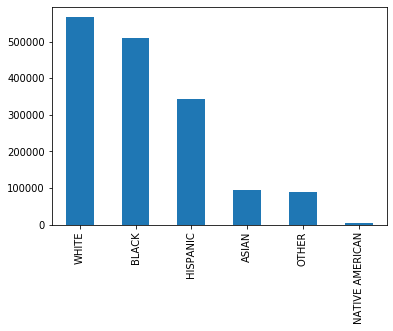

In [17]:
print(data.Race.value_counts())
print(data.Race.value_counts(normalize = True))
data.Race.value_counts().plot.bar()

**566,346 white people were pulled over  
509,102 black people where pulled over**

Population estimates for Montgomery County as of 2018 is 1,052,567, according to the U.S Census Bureau.  
White people account for 60.2% percent of the population in Moco, Black people account for 19.9% of the population in Moco.  

This means white people account for 633,645 persons and black pepople accout 209,461 persons.  

https://www.census.gov/quickfacts/fact/table/montgomerycountymaryland/RHI125218#RHI125218

#### This means while white people make up 60% percent of the montgomery county population, they were only pulled over 35% of the time. 
#### And while black people only make up 19.9% of the population, they were pulled over 31% of the time


Normalizing the data:

In [47]:
data.Search.isna().value_counts()

False    995580
True     609727
Name: Search, dtype: int64

**We are missing 609,727 records if the individual was pulled over or not**

In [51]:
data.groupby('Race').Search.value_counts(normalize = True)

Race             Search
ASIAN            No        0.965905
                 Yes       0.034095
BLACK            No        0.914886
                 Yes       0.085114
HISPANIC         No        0.913222
                 Yes       0.086778
NATIVE AMERICAN  No        0.956427
                 Yes       0.043573
OTHER            No        0.963355
                 Yes       0.036645
WHITE            No        0.943589
                 Yes       0.056411
Name: Search, dtype: float64

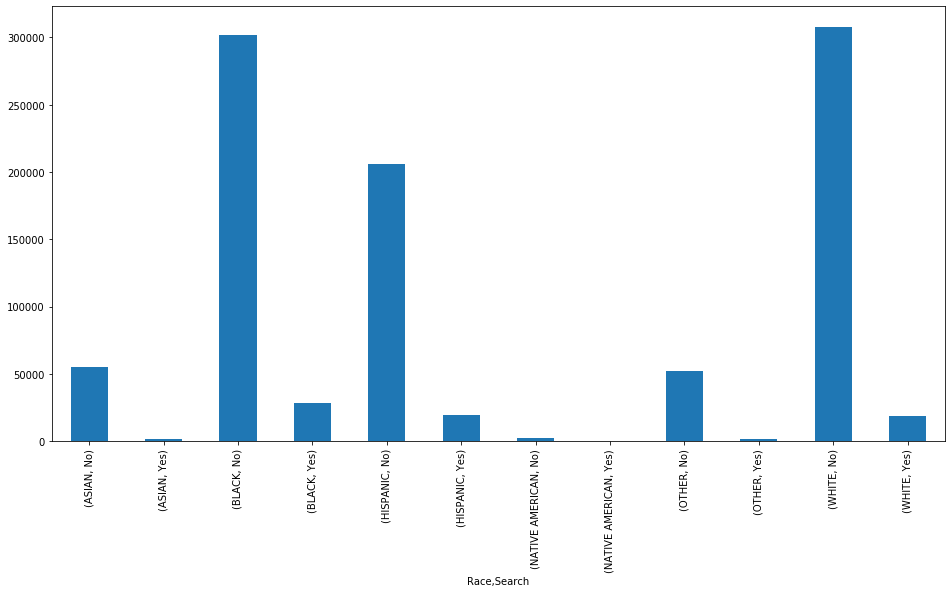

In [52]:
plt.figure(figsize = (16, 8))
data.groupby('Race').Search.value_counts().plot.bar()

# Time Series

In [2]:
import pandas as pd

In [3]:
# create a new 'time_stamp' column from 'Crash Date/Time' using the datetime library in Python
from datetime import datetime
data['Date of Stop'] = pd.to_datetime(data['Date'])

NameError: name 'data' is not defined